# EPA1333 - Computer Engineering for Scientific Computing
## Week 7 

**Python Data Science Handbook**

*Jake VanderPlas*


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
import time
from datetime import date
import datetime

## Links

  * [Pandas Exercises](https://github.com/guipsamora/pandas_exercises)
  * [100 pandas puzzles (well incomplete...)](https://github.com/ajcr/100-pandas-puzzles)
  
  * [Walkthrough exercises from PandasTutorial by Wes McKinney](https://github.com/lemonbalm/pandas-exercises)
  Note: you need to convert these to Python3 first. You can use 2to3 program to convert them automatically ( https://docs.python.org/3.0/library/2to3.html )
  
  * [A few common Excel tasks in Pandas](http://pbpython.com/excel-pandas-comp.html) 
  
  * Some more Tutorials:
    * https://apawlik.github.io/2014-04-09-GARNET/lessons/garnet/pandas/tutorial.html
    * http://efavdb.com/pandas-tips-and-tricks/


# Pandas exercises

## Exercise 3: MovieLens Ratings



### Import data

You can find MovieLens ratings [here](http://grouplens.org/datasets/movielens/).


  1. Download the file [ml-1m.zip](http://files.grouplens.org/datasets/movielens/ml-1m.zip) with 1 million ratings by 6000 users on 4000 movies. 
  2. Unzip the file. This will give you 4 files (README and 3 data files).
  3. Read the README and browse through the data files to understand the structure of the data.
  
  HINT: Use **the read_csv()** command with appropiate arguments

#### Q1: Read the 3 dat files into three separate DataFrames. Name the dataframes and name the columns appropriately.

In [2]:
#temp = 'C:\\Users\\basre\\Desktop\\EPA 1333 - computer engineering\\Week 7\\data1\\data\\MovieLens\\movies.dat'

moviesdf = pd.read_csv('C:\\Users\\basre\\Desktop\\EPA 1333 - computer engineering\\Week 7\\data1\\data\\MovieLens\\movies.dat', sep='::', engine='python' , usecols=[0,1,2,3], names=['MovieID', 'Title', 'Genres'])
usersdf = pd.read_csv('C:\\Users\\basre\\Desktop\\EPA 1333 - computer engineering\\Week 7\\data1\\data\\MovieLens\\users.dat', sep='::', engine='python' , usecols=[0,1,2,3,4,5], names=['UserID','Gender','Age','Occupation','Zip-code'])    
ratingsdf = pd.read_csv('C:\\Users\\basre\\Desktop\\EPA 1333 - computer engineering\\Week 7\\data1\\data\\MovieLens\\ratings.dat', sep='::', engine='python' , usecols=[0,1,2,3,4], names=['UserID', 'MovieID', 'Rating', "Timestamp"])  
    
moviesdf.head(len(moviesdf))

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [4]:
usersdf.head(len(usersdf))

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


#### Q2:  How many users are there? And how many are men and how many are women?

In [5]:
NUsers = usersdf['UserID'].nunique()
NMen = len(usersdf[usersdf.Gender == 'M'])
NWomen = len(usersdf[usersdf.Gender == 'F'])


if ((NMen + NWomen) == NUsers):
    print("There are",NMen,"masculine users, and",NWomen, "feminine users.")
    print('There are',NUsers,'Users in total.')
else:
    print('something went wrong')

There are 4331 masculin users, and 1709 feminine users.
There are 6040 Users in total.


#### Q3: How many ratings are there? How many were made by man and how many by women? Express it in percentages.

In [6]:
Gender = usersdf["Gender"]
UserID = usersdf["UserID"]

dictionary = dict(zip(UserID, Gender))





In [7]:
ratingsdf['Gender']  = ratingsdf.UserID.map(dictionary)
ratingsdf.head(len(ratingsdf))

,UserID,MovieID,Rating,Timestamp,Gender
0,1,1193,5,978300760,F
1,1,661,3,978302109,F
2,1,914,3,978301968,F
3,1,3408,4,978300275,F
4,1,2355,5,978824291,F
...,...,...,...,...,...
1000204,6040,1091,1,956716541,M
1000205,6040,1094,5,956704887,M
1000206,6040,562,5,956704746,M
1000207,6040,1096,4,956715648,M


In [8]:
NTotalRating = len(ratingsdf)

NMRating = len(ratingsdf[ratingsdf.Gender == 'M'])
NWRating = len(ratingsdf[ratingsdf.Gender == 'F'])

percentage_by_women = (NWRating/NTotalRating) * 100
percentage_by_men = (NMRating/NTotalRating) * 100



print("There are ",NTotalRating,"ratings in the Ratings dataframe.")
print("From these ratings", round(percentage_by_men, 2),'%  is done by men. And', round(percentage_by_women, 2),'%  is done by women.')

There are  1000209 ratings in the Ratings dataframe.
From these ratings 75.36 %  is done by men. And 24.64 %  is done by women.


#### Q4: What is the average rating given? What is the average rating given by men and by women separately? Does one gender rate higher on average?


In [9]:
import statistics

In [10]:
Ratingcolumn = ratingsdf["Rating"]

print('The mean of all Ratings is',statistics.mean(Ratingcolumn))

The mean of all Ratings is 3.581564453029317


#### Q5: Plot histograms of the ratings given by men and women in 2 plots, side-by-side.

(0.0, 280000.0)

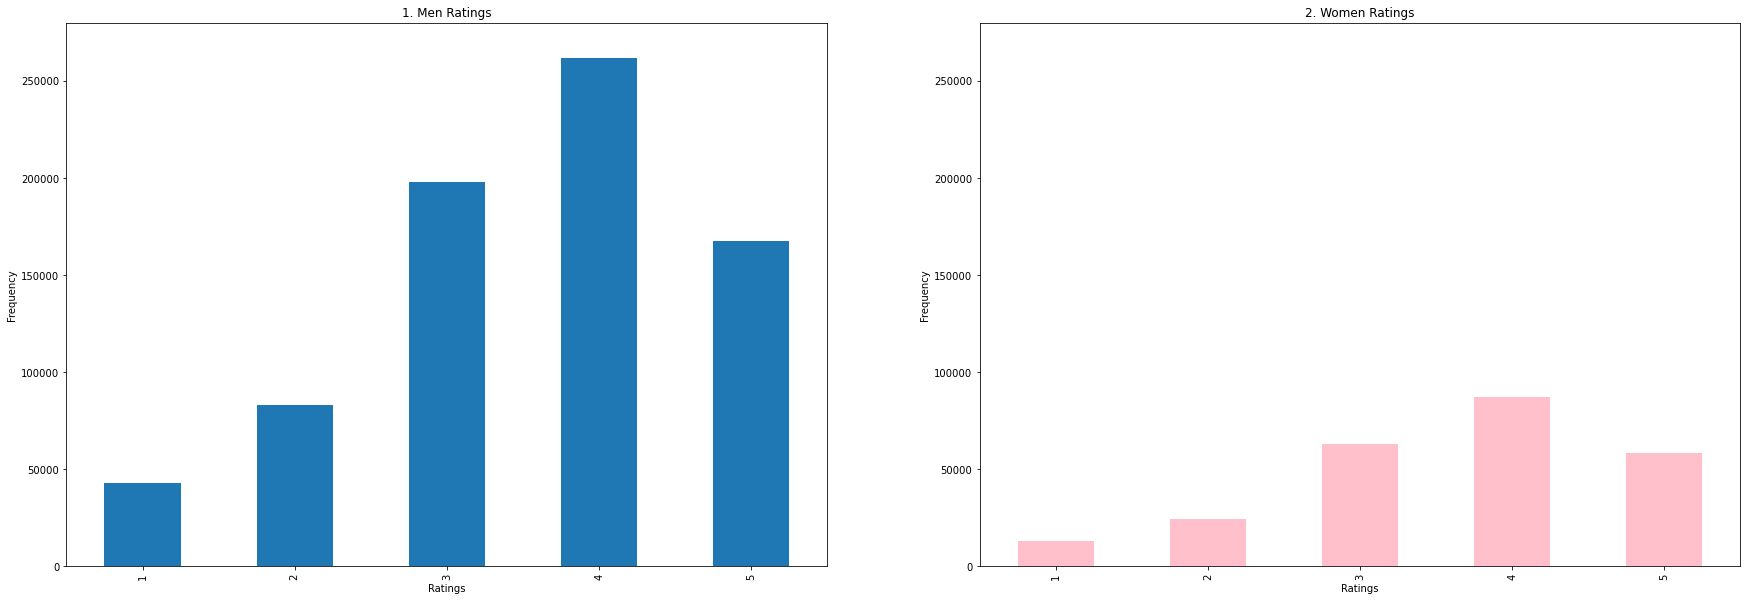

In [11]:
Men_Ratings_df = ratingsdf[ratingsdf.Gender == 'M']
Women_Ratings_df = ratingsdf[ratingsdf.Gender == 'F']


f, axs = plt.subplots(1,2, figsize = (30,10)) # Create subplots
ax1 = axs[0]
ax2 = axs[1]


Men = Men_Ratings_df.groupby('Rating').size()
Women = Women_Ratings_df.groupby('Rating').size()


Men.plot.bar(ax = axs[0])
Women.plot.bar(ax = axs[1], color='Pink')


ax1.set_ylabel('Frequency')
ax2.set_ylabel('Frequency')


ax1.set_xlabel('Ratings')
ax2.set_xlabel('Ratings')



ax1.set_title('1. Men Ratings')
ax2.set_title('2. Women Ratings')


ax1.set_ylim([0, 280000])
ax2.set_ylim([0, 280000])


#### Q6: Add an extra column to the ratings table containing a 'real date' (year, month, day, hours, seconds) instead of a string timestamp. Try it with ```pd.datetime.fromtimestamp``` as well as ```pd.to_datetime```. Do you notice any difference?

*Hint*: If you want to apply a function to an entire column, you can use the function ```apply```:

For example:

    dataframe['ColumnName'].apply( np.sqrt )  # NOTE np.sqrt, not np.sqrt(). 
                                              # We pass the function itself, not calling it!

will apply the function ```np.sqrt``` to each value in the column "ColumnName" of the dataframe and return the result. Note: ```np.sqrt``` is special in that it can also be called as:
    
    np.sqrt( dataframe(['ColumnName'] )
    


# Your code goes here

#### Q7: Give an overview of the ratings given per year.

*Hint*: Datetime and Timestamp data types allow access to their individual members (year, month, day, hour, minute, seconds.

For example:
  
    ts = pd.Timestamp("2016-10-16")
    ts.year -> 2016
    ts.day -> 16
    
In a dataframe you can access these datetime/Timestamp methods by using

    dataframe['Columnname'].dt.year
    
 

In [12]:
ratingsdf['Timestamp'] = pd.to_datetime(ratingsdf['Timestamp'], unit='s')

In [13]:
ratingsdf['Year'] = ratingsdf['Timestamp'].dt.year

In [14]:
ratingsdf.head()

,UserID,MovieID,Rating,Timestamp,Gender,Year
0,1,1193,5,2000-12-31 22:12:40,F,2000
1,1,661,3,2000-12-31 22:35:09,F,2000
2,1,914,3,2000-12-31 22:32:48,F,2000
3,1,3408,4,2000-12-31 22:04:35,F,2000
4,1,2355,5,2001-01-06 23:38:11,F,2001


In [15]:
ratingsdf['Year'] = ratingsdf['Timestamp'].dt.year
ratingsdf.head()

,UserID,MovieID,Rating,Timestamp,Gender,Year
0,1,1193,5,2000-12-31 22:12:40,F,2000
1,1,661,3,2000-12-31 22:35:09,F,2000
2,1,914,3,2000-12-31 22:32:48,F,2000
3,1,3408,4,2000-12-31 22:04:35,F,2000
4,1,2355,5,2001-01-06 23:38:11,F,2001


In [16]:

for i in range(2000,2005):
    year = ratingsdf[ratingsdf.Year == i]
    if len(year) > 0:
        year_rating_column = year["Rating"]
        print('Year:',i, 'Number of Rating:', len(year), 'with a mean of:' ,round(statistics.mean(year_rating_column),1))
    else:
        print('Year:',i, 'NaN')

Year: 2000 Number of Rating: 904757 with a mean of: 3.6
Year: 2001 Number of Rating: 68058 with a mean of: 3.5
Year: 2002 Number of Rating: 24046 with a mean of: 3.5
Year: 2003 Number of Rating: 3348 with a mean of: 3.5
Year: 2004 NaN


#### Q8: How many genres are there? (Count them from the tables, verify with what you find in the README)

In [17]:
from collections import Counter

GenresList = list(moviesdf.Genres.unique())
z = set() 

for i in range(len(GenresList)):
    a = GenresList[i]
    a = a.split('|')
    for j in range(len(a)):
        z.add(a[j])

print(z)
print(len(z), 'Different genres')

{'Western', "Children's", 'Sci-Fi', 'Romance', 'Film-Noir', 'Action', 'Musical', 'Horror', 'War', 'Animation', 'Adventure', 'Documentary', 'Drama', 'Fantasy', 'Mystery', 'Crime', 'Comedy', 'Thriller'}
18 Different genres


#### Q9: Count how many movies there are in each genre category.

In [18]:
Genres = list(z)
b = 0

for i in range(len(Genres)):
    a = len(moviesdf[moviesdf['Genres'].str.contains(Genres[i])])
    print('There are',a,'movies in the the genre:',Genres[i])
    b += a

    

There are 68 movies in the the genre: Western
There are 251 movies in the the genre: Children's
There are 276 movies in the the genre: Sci-Fi
There are 471 movies in the the genre: Romance
There are 44 movies in the the genre: Film-Noir
There are 503 movies in the the genre: Action
There are 114 movies in the the genre: Musical
There are 343 movies in the the genre: Horror
There are 143 movies in the the genre: War
There are 105 movies in the the genre: Animation
There are 283 movies in the the genre: Adventure
There are 127 movies in the the genre: Documentary
There are 1603 movies in the the genre: Drama
There are 68 movies in the the genre: Fantasy
There are 106 movies in the the genre: Mystery
There are 211 movies in the the genre: Crime
There are 1200 movies in the the genre: Comedy
There are 492 movies in the the genre: Thriller


#### Q10: How many ratings did the movie 'Casino (1995)' receive? What was the average rating for this movie?

In [29]:
Title = moviesdf["Title"]
MovieID = moviesdf["MovieID"]

dictionary = dict(zip(MovieID, Title))

ratingsdf['Title']  = ratingsdf.MovieID.map(dictionary)
ratingsdf.head(len(ratingsdf))

Casino_1995 = ratingsdf[ratingsdf.Title == 'Casino (1995)']

Ratingcolumn_Casino_1995 = Casino_1995['Rating']



print('Casino (1995) received',len(Casino_1995), 'Ratings.')
print('The average rating for this movie is', round((statistics.mean(Ratingcolumn_Casino_1995)),1))

Casino (1995) received 682 Ratings.
The average rating for this movie is 3.8


#### Q11: What was the average rating of men for this movie? What was the average of women for this movie?

In [21]:
Casino_1995.head(len(Casino_1995))

,UserID,MovieID,Rating,Timestamp,Gender,Year,Title
387,5,16,3,2000-12-31 06:54:05,M,2000,Casino (1995)
655,8,16,4,2000-12-31 02:34:55,M,2000,Casino (1995)
774,9,16,4,2000-12-31 01:36:39,M,2000,Casino (1995)
2654,22,16,4,2000-12-30 00:26:19,M,2000,Casino (1995)
2945,23,16,4,2001-01-02 20:11:49,M,2001,Casino (1995)
...,...,...,...,...,...,...,...
988210,5964,16,4,2000-04-29 07:51:07,M,2000,Casino (1995)
992912,5998,16,3,2001-09-30 06:30:35,M,2001,Casino (1995)
993627,6001,16,3,2000-04-27 04:48:21,F,2000,Casino (1995)
996263,6016,16,3,2000-04-28 21:59:51,M,2000,Casino (1995)


In [22]:
Men_Rating_Casino_1995 = Casino_1995[Casino_1995.Gender == 'M']
Women_Rating_Casino_1995 = Casino_1995[Casino_1995.Gender == 'F']

Men_Rating_Casino_1995_Rating_column = Men_Rating_Casino_1995['Rating']
Women_Rating_Casino_1995_Rating_column = Women_Rating_Casino_1995['Rating']

print('The average ratings on the movie Casino (1995) for men is',statistics.mean(Men_Rating_Casino_1995_Rating_column),'and for women it is',statistics.mean(Women_Rating_Casino_1995_Rating_column))

The average ratings on the movie Casino (1995) for men is 3.8378870673952643 and for women it is 3.6090225563909772
